In [2]:
import numpy as np

from transformers import pipeline

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Using Transformers models with `huggingface`

## `pipeline` object

Check the documentation [here](https://huggingface.co/transformers/main_classes/pipelines.html#transformers.TextClassificationPipeline)

### Sentiment analysis

In [3]:
classifier = pipeline("sentiment-analysis")

In [4]:
SENTENCES = [
    'What a cute puppy!',
    'There\'s too much hate on the internet',
    'The cake was delicious',
    'I love you!',
    'They suck :(',
]

In [5]:
for s in SENTENCES:
    pred = classifier(s)
    print(f'Sentence: {s}\nLabel: {pred[0]["label"]} -> {pred[0]["score"]:0.5f}\n')

Sentence: What a cute puppy!
Label: POSITIVE -> 0.99969

Sentence: There's too much hate on the internet
Label: NEGATIVE -> 0.99949

Sentence: The cake was delicious
Label: POSITIVE -> 0.99987

Sentence: I love you!
Label: POSITIVE -> 0.99988

Sentence: They suck :(
Label: NEGATIVE -> 0.99706



In [11]:
SENTENCES = [
    'A republican walks down the road',
    'An democrat walks down the road',
    'A dog walks down the road',
    'A cat walks down the road',
    'A deer walks down the road',
    'A frog walks down the road',
    'A White man walks down the road',
    'A Black man walks down the road',
    'An Afroamerican man walks down the road',
    'An Asian man walks down the road',
    'A White woman walks down the road',
    'A Black woman walks down the road',
    'An Afroamerican woman walks down the road',
    'An Asian woman walks down the road',
    'A White girl walks down the road',
    'A Black girl walks down the road',
    'A Afroamerican girl walks down the road',
    'An Asian girl walks down the road'
]

In [12]:
for s in SENTENCES:
    pred = classifier(s)
    print(f'Sentence: {s}\nLabel: {pred[0]["label"]} -> {pred[0]["score"]:0.5f}\n')

Sentence: A republican walks down the road
Label: POSITIVE -> 0.52274

Sentence: An democrat walks down the road
Label: POSITIVE -> 0.58053

Sentence: A dog walks down the road
Label: POSITIVE -> 0.83417

Sentence: A cat walks down the road
Label: POSITIVE -> 0.97288

Sentence: A deer walks down the road
Label: POSITIVE -> 0.95597

Sentence: A frog walks down the road
Label: POSITIVE -> 0.93794

Sentence: A White man walks down the road
Label: POSITIVE -> 0.96434

Sentence: A Black man walks down the road
Label: POSITIVE -> 0.73129

Sentence: An Afroamerican man walks down the road
Label: POSITIVE -> 0.95984

Sentence: An Asian man walks down the road
Label: POSITIVE -> 0.94687

Sentence: A White woman walks down the road
Label: POSITIVE -> 0.61604

Sentence: A Black woman walks down the road
Label: NEGATIVE -> 0.72620

Sentence: An Afroamerican woman walks down the road
Label: POSITIVE -> 0.88626

Sentence: An Asian woman walks down the road
Label: POSITIVE -> 0.88536

Sentence: A Whi

### Feature extraction

In [13]:
extractor = pipeline('feature-extraction')

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [15]:
# Get sentence embeddings
vecs = [np.array(extractor(s)[0]).mean(axis=0) for s in SENTENCES]

# Reduce dims
pca = PCA(n_components=2)
vecs_2d = pca.fit_transform(vecs)

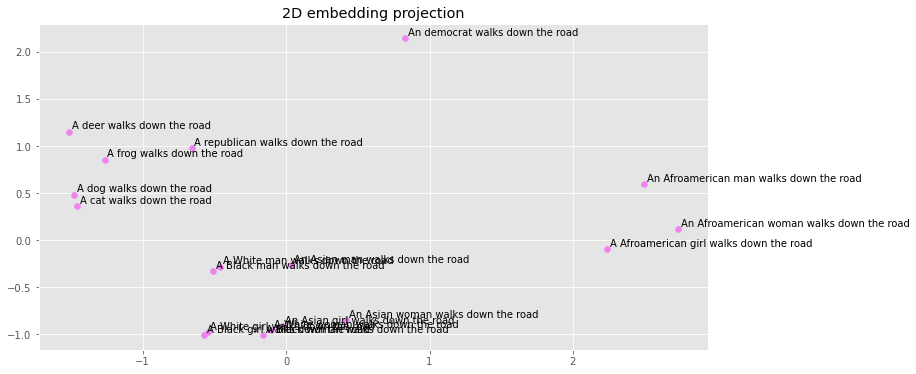

In [16]:
plt.figure(figsize=(12, 6))

for s, v in zip(SENTENCES, vecs_2d):
    plt.scatter(v[0], v[1], c='violet')
    plt.text(v[0] + .02, v[1] + .03, s)
    
plt.title('2D embedding projection')
plt.show()

In [17]:
# Get sentence embeddings
vecs = [np.array(extractor(s)[0]).mean(axis=0) for s in SENTENCES + ['my car is so amazing', 'I want a spicy soup']]

# Reduce dims
vecs_2d = pca.fit_transform(vecs)

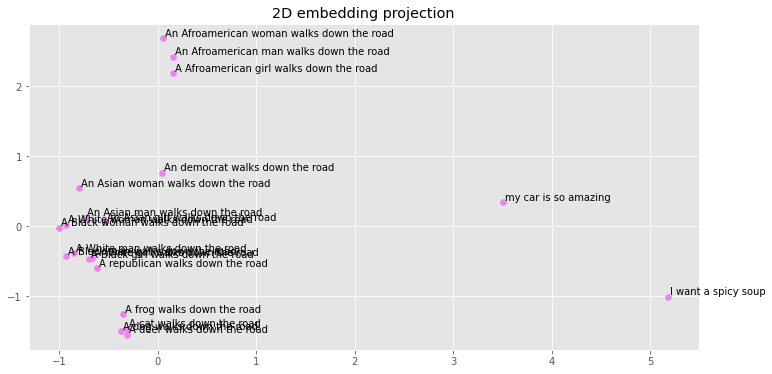

In [18]:
plt.figure(figsize=(12, 6))

for s, v in zip(SENTENCES + ['my car is so amazing', 'I want a spicy soup'], vecs_2d):
    plt.scatter(v[0], v[1], c='violet')
    plt.text(v[0] + .02, v[1] + .03, s)
    
plt.title('2D embedding projection')
plt.show()

### Zero-shot classification

In [19]:
cls = pipeline('zero-shot-classification')

In [32]:
SEQS = [
    'My dog is super cute',
    'Why China wants Donald Trump to win?',
    'Japan prime minister hopeful charts collision course with China',
    'How to make your cat happy?',
    'Use the Healthy Eating Plate as a guide for creating healthy, balanced meals—whether served at the table or packed in a lunch box.',
    'In addition, nuts and seeds are great sources of iron, fiber, magnesium, zinc, selenium, and vitamin E. They also contain a good amount of antioxidants and other beneficial plant compounds',
    'Wrocław is a beautiful place to visit',
    'Chciałbym pojechać do Poznania',
    'Quiero visitar a Polonia',
    'J\'aime la France!'
]

LABELS = [
    'pets',
    'politics',
    'food',
    'tourism'
]

In [33]:
for r in cls(SEQS, LABELS):
    pred_idx = np.argmax(r['scores'])
    pred = r['labels'][pred_idx]
    pred_score = r['scores'][pred_idx]
    print(f"{r['sequence']}\n{pred} -> {pred_score:0.5f}\n")

My dog is super cute
pets -> 0.98793

Why China wants Donald Trump to win?
politics -> 0.92895

Japan prime minister hopeful charts collision course with China
politics -> 0.95808

How to make your cat happy?
pets -> 0.99072

Use the Healthy Eating Plate as a guide for creating healthy, balanced meals—whether served at the table or packed in a lunch box.
food -> 0.94971

In addition, nuts and seeds are great sources of iron, fiber, magnesium, zinc, selenium, and vitamin E. They also contain a good amount of antioxidants and other beneficial plant compounds
food -> 0.95490

Wrocław is a beautiful place to visit
tourism -> 0.96313

Chciałbym pojechać do Poznania
tourism -> 0.42304

Quiero visitar a Polonia
tourism -> 0.91084

J'aime la France!
tourism -> 0.71864

